In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("vw.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [4]:
data.shape

(15157, 9)

In [5]:
###Checking for missing values
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## CHECKING AND DEALING WITH OUTLIERS
- ### For model building, outliers will have a major effect on the output, depending on the model we use
- ### In this section, i'll be dealing with the outliers using IterativeImputer.
- ### It works like this, we'll first look for the upper and lower boundary and then impute any value with less than or more than the upper and lower boundary value with a NaN value.
- ### Then we use IterativeImputer to fill in the missing value using RandomForestRegressor as Estimator.

In [6]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


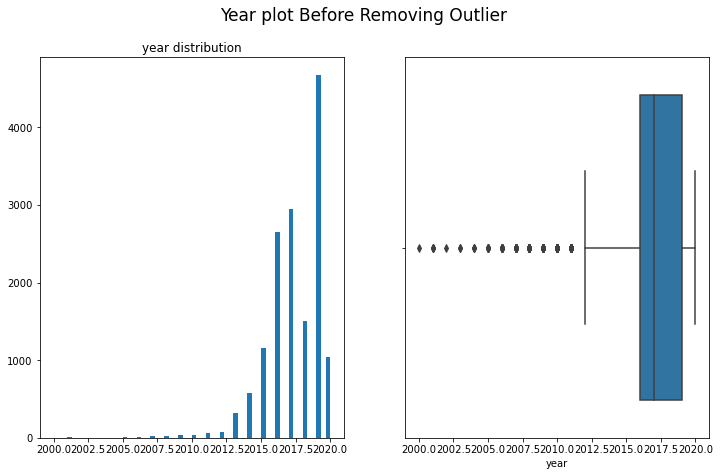

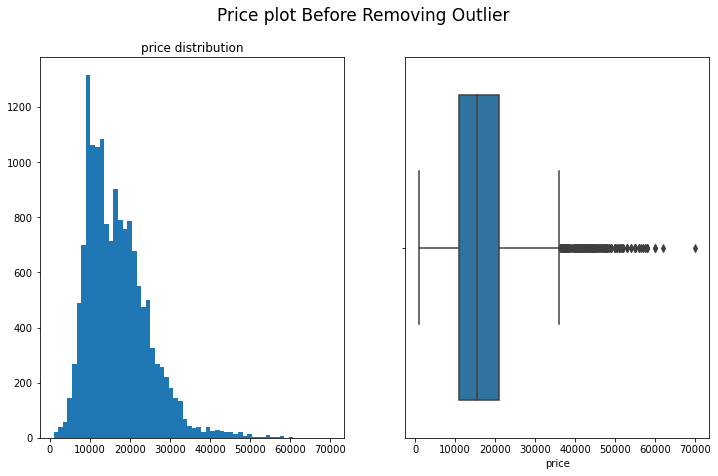

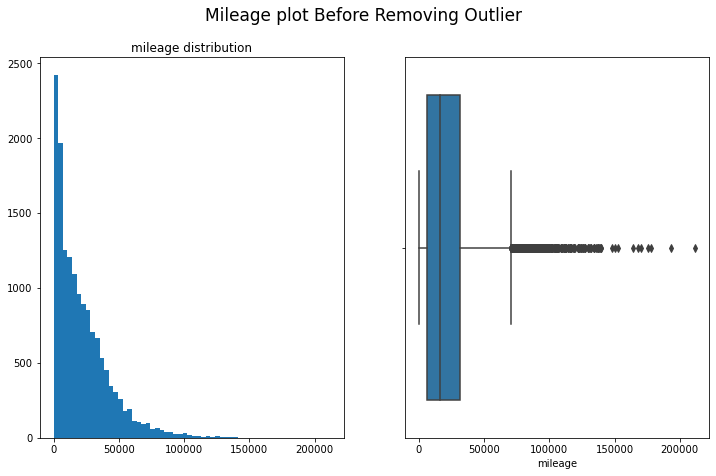

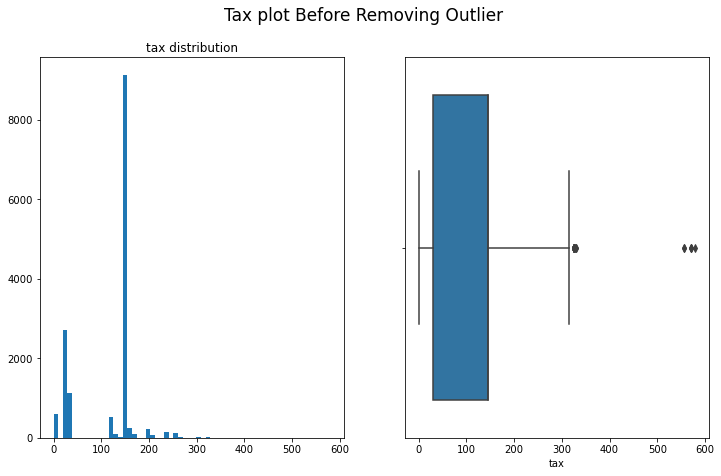

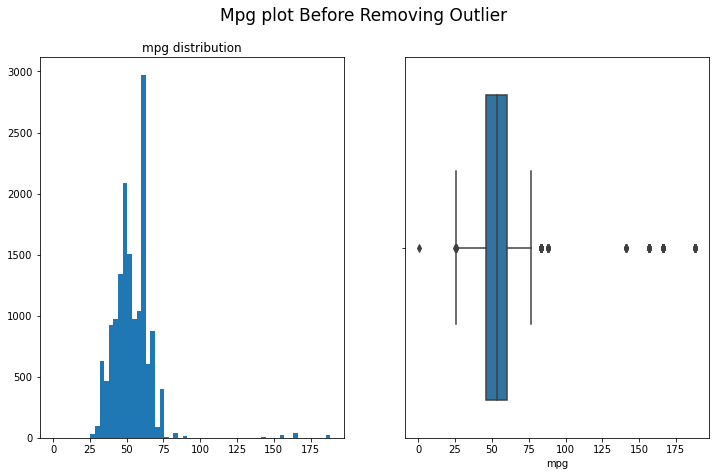

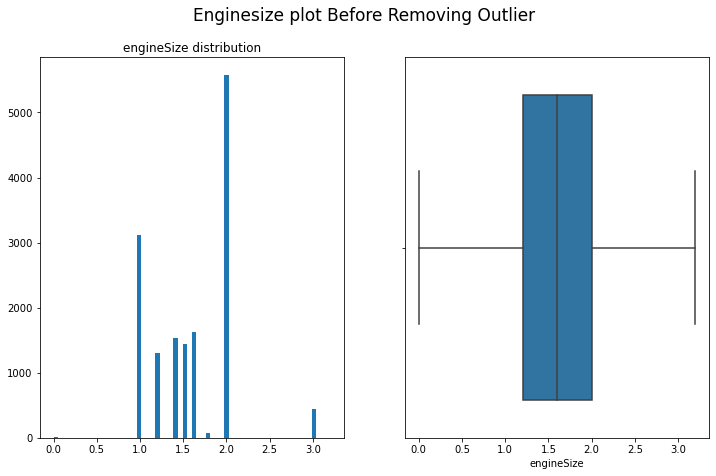

In [7]:
cat_feature = [
            feature for feature in data.columns
                if data[feature].dtype == object
        ]
num_feature = [
            feature for feature in data.columns
                if data[feature].dtype != object
        ]
###plotting and checking for outliers
for feature in num_feature:
    ##defining the plot
    plt.figure(figsize=(12,7))
    plt.suptitle("{} plot Before Removing Outlier".format(feature.title()), fontsize=17)
    plt.subplot(1,2,1)
    plt.hist(data[feature], bins=60)
    plt.title("{} distribution".format(feature.replace("_"," ")))

    plt.subplot(1,2,2)
    sns.boxplot(data[feature])
    plt.show()

In [8]:
new_df = data.copy()

In [9]:
features = [feature for feature in num_feature if feature != "year"]
print(features)

['price', 'mileage', 'tax', 'mpg', 'engineSize']


In [10]:
###Dealing with the outlier.
features = [feature for feature in num_feature if feature != "year"]
for feature in new_df[features].columns:     
    Q1 = new_df[feature].quantile(0.25)   ###Lowe quantile
    Q3 = new_df[feature].quantile(0.75)   ###Upper quantile
    IQR = Q3 - Q1    ###Interquantile range
    lower_boundary = Q1 - (1.5 * IQR)
    upper_boundary = Q3 + (1.5 * IQR)

    ###Replacing the outlier with a nan value
    new_df.loc[new_df[feature] > upper_boundary, feature] = np.nan
    new_df.loc[new_df[feature] < lower_boundary, feature] = np.nan
    
Iter = IterativeImputer(
    estimator=RandomForestRegressor(random_state=42),
        max_iter=7, random_state=42, verbose=1, initial_strategy="median"
        )
transformed = Iter.fit_transform(new_df[num_feature])
transformed_data = pd.DataFrame(transformed, columns=new_df[num_feature].columns)
new_data = pd.concat([transformed_data, new_df[cat_feature]], axis="columns")

[IterativeImputer] Completing matrix with shape (15157, 6)
[IterativeImputer] Change: 52327.399999999994, scaled tolerance: 70.438 
[IterativeImputer] Change: 7645.887000000003, scaled tolerance: 70.438 
[IterativeImputer] Change: 6821.214000000004, scaled tolerance: 70.438 
[IterativeImputer] Change: 1228.3800000000047, scaled tolerance: 70.438 
[IterativeImputer] Change: 3040.1399999999994, scaled tolerance: 70.438 
[IterativeImputer] Change: 725.8120000000032, scaled tolerance: 70.438 
[IterativeImputer] Change: 607.3699999999953, scaled tolerance: 70.438 


In [11]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [12]:
new_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16606.297407,20720.605446,112.578063,52.948700,1.600693
std,2.053059,7041.640604,17290.567357,62.767878,9.964691,0.461695
min,2000.000000,899.000000,1.000000,0.000000,25.900000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16358.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31765.312500,145.000000,60.100000,2.000000
max,2020.000000,36000.000000,70438.000000,315.000000,76.400000,3.200000


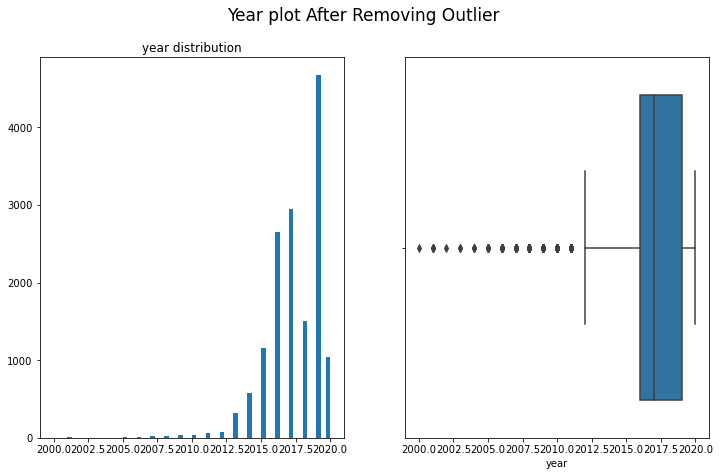

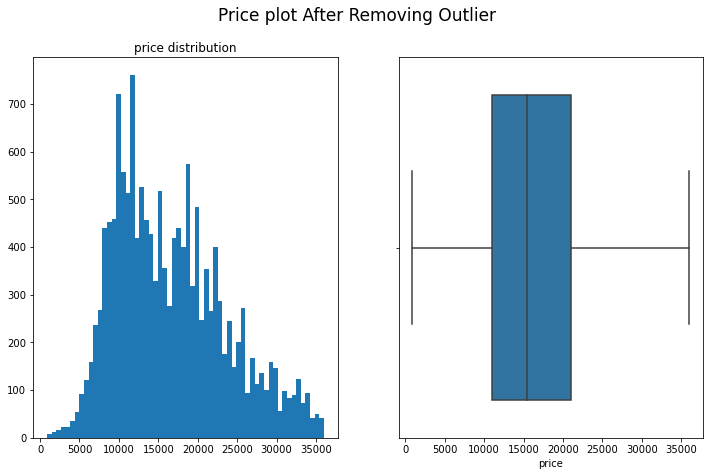

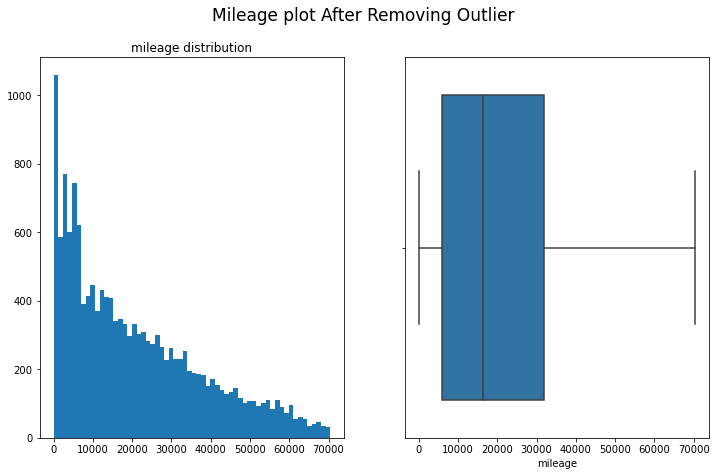

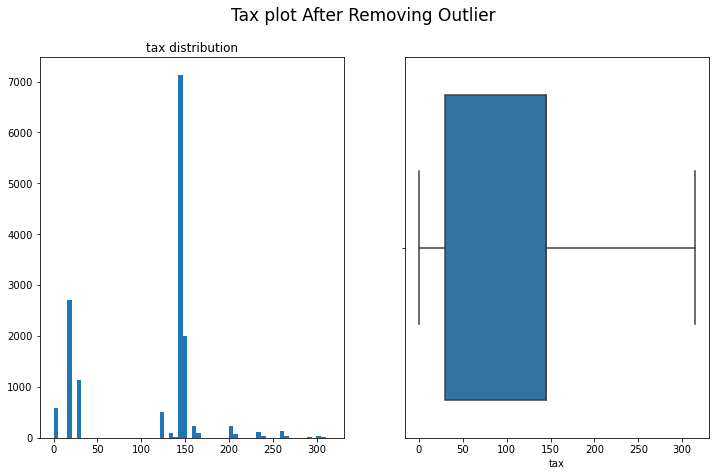

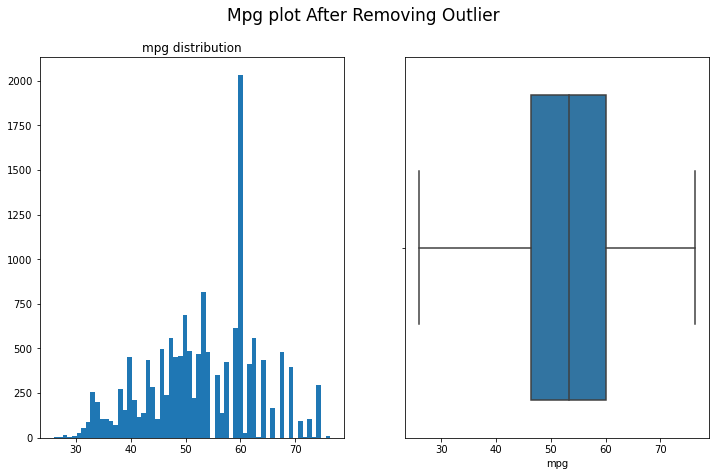

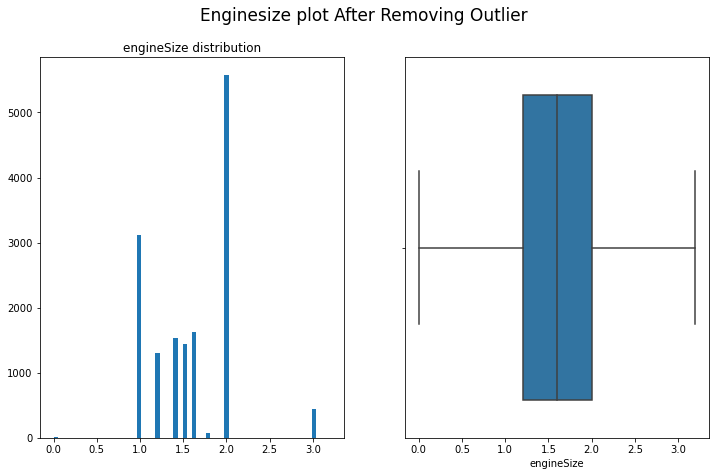

In [13]:
cat_feature = [
            feature for feature in data.columns
                if data[feature].dtype == object
        ]
num_feature = [
            feature for feature in data.columns
                if data[feature].dtype != object
        ]
###plotting and checking for outliers
for feature in num_feature:
    ##defining the plot
    
    plt.figure(figsize=(12,7))
    plt.suptitle("{} plot After Removing Outlier".format(feature.title()), fontsize=17)
    plt.subplot(1,2,1)
    plt.hist(new_data[feature], bins=60)
    plt.title("{} distribution".format(feature.replace("_"," ")))

    plt.subplot(1,2,2)
    sns.boxplot(new_data[feature])
    plt.show()

# VISUALIZATION

In [14]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


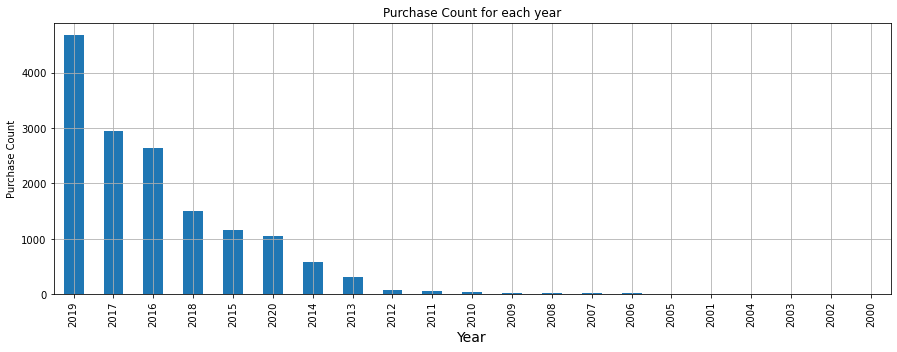

In [15]:
plt.figure(figsize=(15,5))
data["year"].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Purchase Count for each year")
plt.xlabel("Year",fontsize=14)
plt.ylabel("Purchase Count")
plt.grid()

Text(0.5, 1.0, 'Model Purchased by Year')

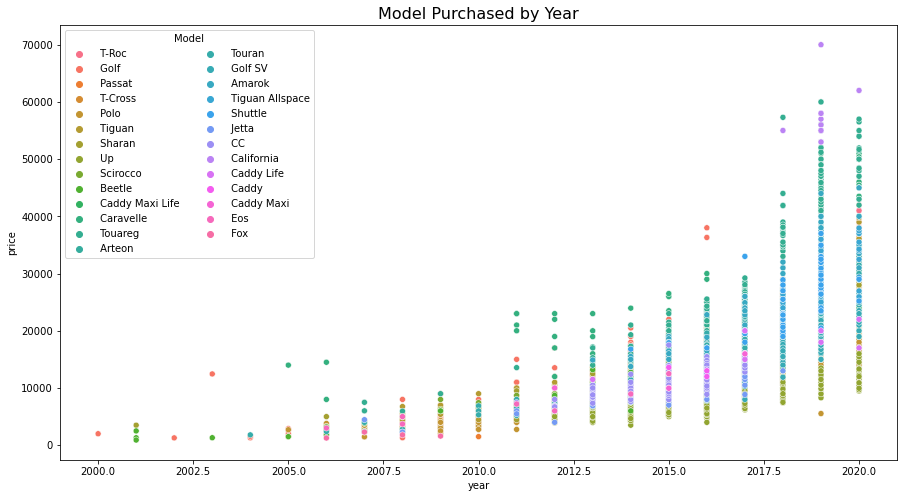

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x="year",y="price",hue="model")
plt.legend(title="Model",ncol=2)
plt.title("Model Purchased by Year",fontsize=16)

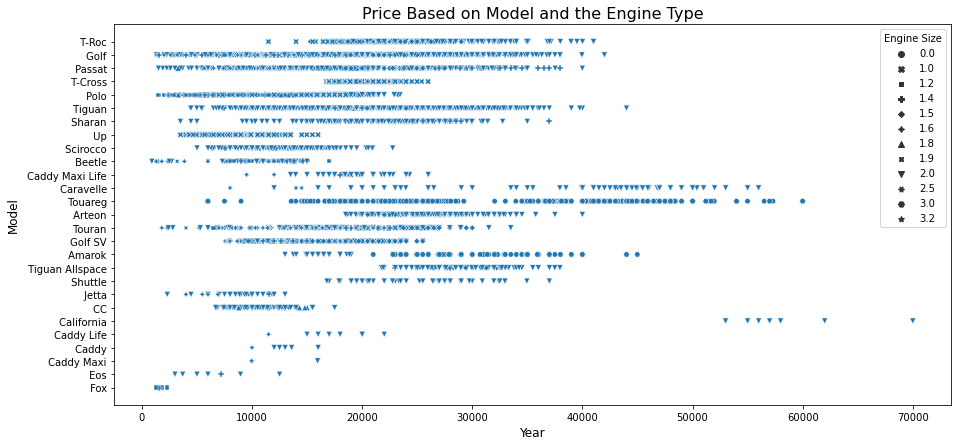

In [17]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x="price",y="model", style="engineSize")
plt.title("Price Based on Model and the Engine Type",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Model",fontsize=12)
plt.legend(title="Engine Size")

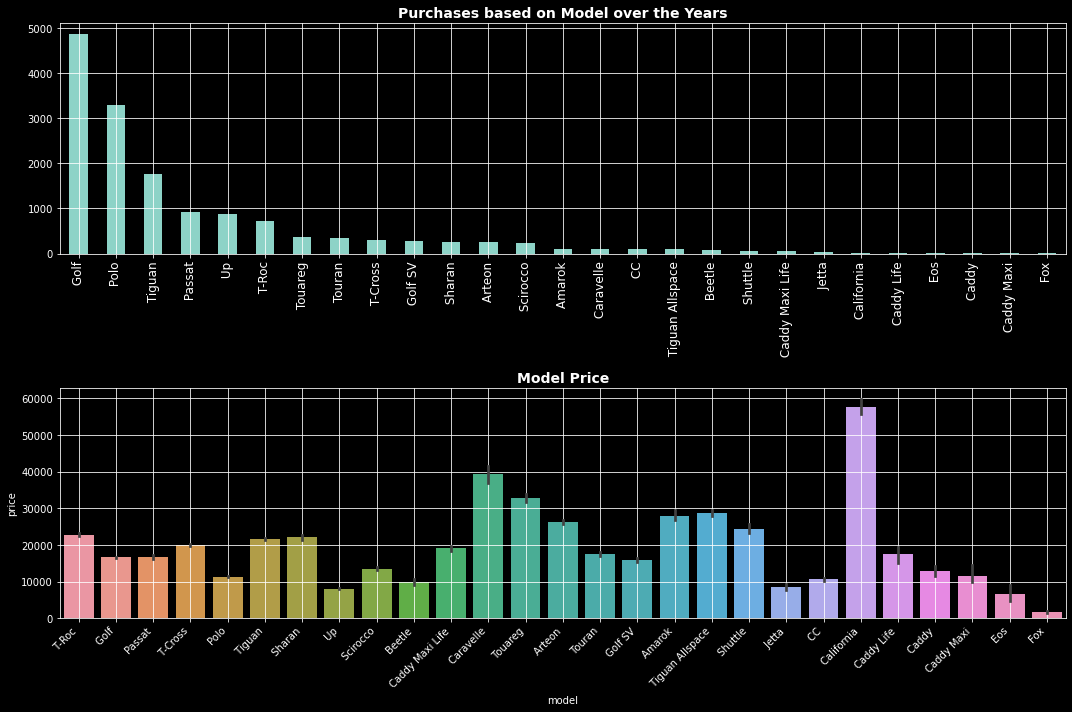

In [18]:
plt.style.use("dark_background")
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
data.model.value_counts().plot(kind="bar")
plt.title(
        "Purchases based on Model over the Years", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12)
plt.grid()
plt.subplot(2,1,2)
sns.barplot(data["model"],data["price"])
plt.xticks(rotation=45,horizontalalignment="right")
plt.title(
        "Model Price", fontsize=14, fontweight="bold")
plt.grid()

plt.tight_layout()
plt.show()



### The above is quite expected. California model car which is the most expensive got a relatively low purchase due to the high price. Those buying the car will be from rich class. Now Golf model has the highest purchase count because the price is quiet affordable by most people in average class for transit

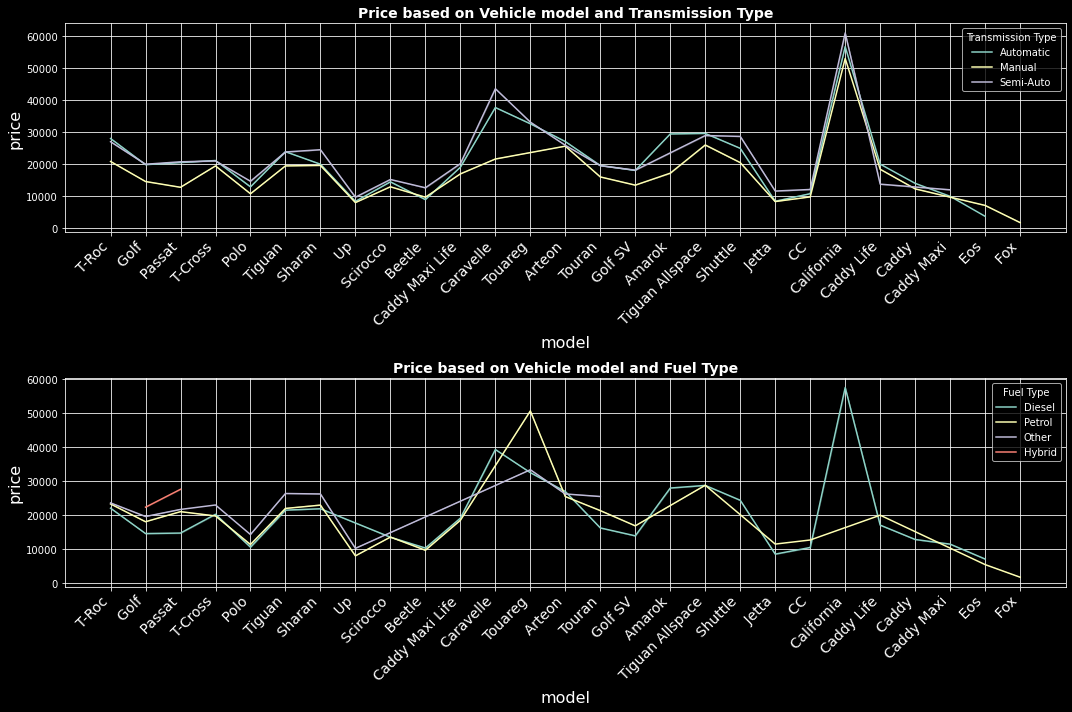

In [19]:

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.lineplot(data["model"],data["price"], hue=data["transmission"],ci=False,markers=".")
plt.title(
        "Price based on Vehicle model and Transmission Type", fontsize=14, fontweight="bold")
plt.xticks(
        fontsize=14,rotation=45,horizontalalignment="right"
        )
plt.legend(title="Transmission Type")
plt.xlabel("model",fontsize=16)
plt.ylabel("price",fontsize=16)
plt.grid()
plt.subplot(2,1,2)
sns.lineplot(data["model"],data["price"], hue=data["fuelType"],ci=False,markers=".")
plt.xticks(
        rotation=45,horizontalalignment="right",fontsize=14)
plt.legend(title="Fuel Type",loc="best")
plt.xlabel("model",fontsize=16)
plt.ylabel("price",fontsize=16)
plt.title(
        "Price based on Vehicle model and Fuel Type", fontsize=14, fontweight="bold")
plt.grid()

plt.tight_layout()
plt.show()

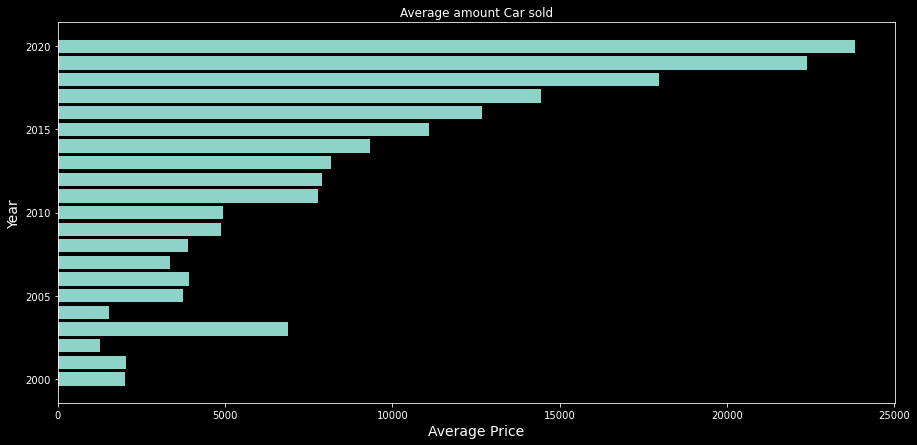

In [20]:
avg_price = [data.loc[data["year"]==cur_year]["price"].mean()
                for cur_year in list(np.arange(start=2000,stop=2021,step=1)) 
                ]
years = list(np.arange(start=2000,stop=2021,step=1))
plt.figure(figsize=(15,7))

plt.barh(years,avg_price)
plt.title("Average amount Car sold")
plt.ylabel("Year", fontsize=14)
plt.xlabel("Average Price", fontsize=14)
plt.show()

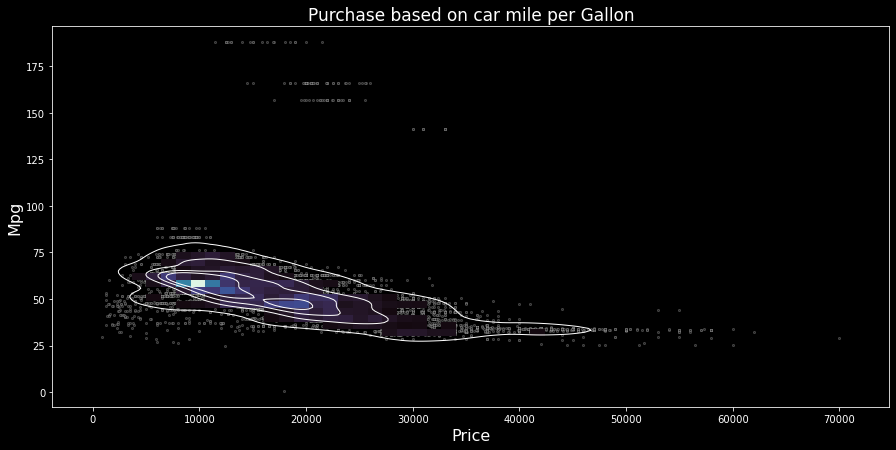

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=data["price"], y=data["mpg"], s=5, color=".15")
sns.histplot(x=data["price"], y=data["mpg"], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=data["price"], y=data["mpg"], levels=5, color="w", linewidths=1)
plt.title("Purchase based on car mile per Gallon",fontsize=17)
plt.xlabel("Price",fontsize=16)
plt.ylabel("Mpg",fontsize=16)


plt.show()